 In this task, we will summarize all the codes we have mentioned in previous task. You are required to fill the missing
 parts of the codes of this template by the end of this class. 

## Section 1: Create network via networkx

Please create an indirect network with 100 nodes and randomly edge connection. You may use the following template

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools

In [9]:
def edge_list(node_num, probability):
    # Please finishe the edge list creation in this function ...
    edge_list_created = []
    node_list = list(range(node_num))
    for node_pair in itertools.combinations(node_list, 2):
        p = random.random()
        if p < probability:
            edge_list_created.append(node_pair)
            
    return edge_list_created

In [ ]:
# create edge list from your defined function. 
edgelist = edge_list(node_num=30, probability=0.3)
 # then you can create the graph using the edge list
G = nx.from_edgelist(edgelist)

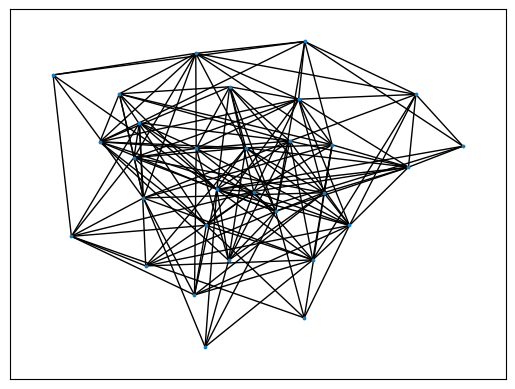

In [16]:
# we use the spring layout to determine the position of nodes. You can find more types of layout in the website
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

pos = nx.spring_layout(G) 
# Finish the visualization of the network you just created.
nx.draw_networkx(G, pos, with_labels=False, node_size=3)


## Section 2: Create network via the geographic data

In [1]:
import geopandas as gpd
import momepy


/opt/homebrew/Caskroom/miniconda/base/envs/CIE500/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Please read the data in the folder rivernetwork. 
gpd_data = gpd.read_file("/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/CIE500_XF/week6/rivernetwork/networkoregon.shp")

In [4]:
# Visualize the data structure of the geopandas data
gpd_data.head()

,IHABBSRF_I,RR,HUC,TYPE,PMILE,PNAME,OWNAME,PNMCD,OWNMCD,DSRR,...,MINY,MAXX,MAXY,CNTX,CNTY,AREA,PERIM,HEIGHT,WIDTH,geometry
0,45650,17100103064,17100103,S,43.7,PORTER CR N FK,0,17100103036,None,17100103063,...,5.160959e+06,-1.313568e+07,5.942097e+06,-1.352532e+07,5.551528e+06,6.087154e+11,3.120811e+06,781138.1035,779267.3576,"LINESTRING (-13716765.459 5942097.011, -137165..."
1,45651,17100103066,17100103,S,42.4,PORTER CR,0,17100103034,None,17100103062,...,5.160959e+06,-1.313568e+07,5.942097e+06,-1.352532e+07,5.551528e+06,6.087154e+11,3.120811e+06,781138.1035,779267.3576,"LINESTRING (-13719166.551 5941635.891, -137192..."
2,45653,17100103063,17100103,R,42.4,PORTER CR N FK,0,17100103036,None,17100103062,...,5.160959e+06,-1.313568e+07,5.942097e+06,-1.352532e+07,5.551528e+06,6.087154e+11,3.120811e+06,781138.1035,779267.3576,"LINESTRING (-13719166.551 5941635.891, -137188..."
3,45657,17100105018,17100105,S,2.4,HOQUIAM R E FK,0,17100105010,None,17100105017,...,5.160959e+06,-1.313568e+07,5.942097e+06,-1.352532e+07,5.551528e+06,6.087154e+11,3.120811e+06,781138.1035,779267.3576,"LINESTRING (-13790745.752 5941063.217, -137905..."
4,45660,17030001019,17030001,R,514.0,YAKIMA R,0,17030003001,None,17030001018,...,5.160959e+06,-1.313568e+07,5.942097e+06,-1.352532e+07,5.551528e+06,6.087154e+11,3.120811e+06,781138.1035,779267.3576,"LINESTRING (-13423549.576 5940970.636, -134233..."


In [5]:
# using the geopands.explode function to explode multi-line into multiple  single line. 

gpd_data_exploded = gpd_data.explode(ignore_index=True, index_parts=False)

In [8]:
# Now convert the gpd data into networkx via momepy

G = momepy.gdf_to_nx(
gpd_data_exploded,
approach="primal",
multigraph=False,
directed=False,
length="length",
)
G.remove_edges_from(nx.selfloop_edges(G))

In [9]:
# Please use this code to visaulize you network

pos = {node: node for node in G.nodes()}



## Section 3: Create network via hydraulic model

Most common hydraulic models developed by US EPA is the EPANET and SWMM. Both files use an inp format. Each model has a
corresponding python package, i.e., the wntr and swmmio. We will visualize both models using networkx in this class. 

Install the wntr and pyswmm in your computer:

pip install wntr

pip install swmmio

In [ ]:
from swmmio import Model
import networkx as nx

In [ ]:
model = Model('Drainage_Example.inp')
G = model.network
pos = {}
for node in G.nodes():
    pos[node] = G.nodes[node]['geometry']['coordinates']

In [ ]:
# Plost the drainage system in this cell

We also have the graph conversion tool for the hydraulic system

In [ ]:
import wntr

wn = wntr.network.WaterNetworkModel("Drinking_example.inp")

G =wntr.network.io.to_graph(wn)

pos = {}
for node in G.nodes():
    pos[node]  = G.nodes[node]['pos']


In [ ]:
nx.draw_networkx(G,
    pos=pos,
    width=0.5,
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    arrowsize = 0.5,
    node_size=0,)